In [53]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 32
num_classes = 10
epochs = 8

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

色の情報を付加する。1文字目→赤、２文字目→緑、３文字目→青、…のように変換。

In [55]:
def conv_x(x_arr):
    x1_arr = []
    for i, x in enumerate(x_arr):
        n = i%3
        x1 = np.zeros((28,28,3))
        x1[:,:,n] = x[:,:,0]
        #plt.imshow(x1)
        x1_arr.append(x1)
    return np.array(x1_arr)

x_train = conv_x(x_train)
x_test = conv_x(x_test)

ラベルのほうは、赤の”１”→ [0 1 0 0 0 0 0 0 0 0  1 0 0]のようなbinalizationを行う。最後の３桁はRGB

In [56]:
def conv_y(y0_arr):
    y1_arr = keras.utils.to_categorical(y0_arr, num_classes)
    y2_arr = np.array([i%3 for i,y in enumerate(y0_arr)])
    y2_arr = keras.utils.to_categorical(y2_arr)
    
    return np.c_[y1_arr, y2_arr]

y_train = conv_y(y_train)
y_test = conv_y(y_test)

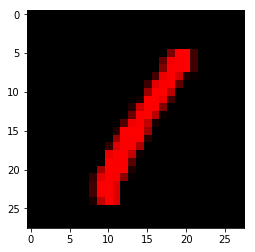

In [57]:
plt.imshow(x_train[3])

In [58]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [59]:
x_train.shape

(60000, 28, 28, 3)

In [60]:
input_shape = (28,28,3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(num_classes + 3, activation='sigmoid'))

#model.compile(loss=keras.losses.categorical_crossentropy,
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 190us/step - loss: 0.0753 - acc: 0.9737 - val_loss: 0.0180 - val_acc: 0.9938
Epoch 2/8
60000/60000 [==============================] - 11s 176us/step - loss: 0.0301 - acc: 0.9899 - val_loss: 0.0120 - val_acc: 0.9959
Epoch 3/8
60000/60000 [==============================] - 10s 173us/step - loss: 0.0226 - acc: 0.9924 - val_loss: 0.0094 - val_acc: 0.9966
Epoch 4/8
60000/60000 [==============================] - 11s 176us/step - loss: 0.0195 - acc: 0.9936 - val_loss: 0.0085 - val_acc: 0.9971
Epoch 5/8
60000/60000 [==============================] - 11s 179us/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0075 - val_acc: 0.9973
Epoch 6/8
60000/60000 [==============================] - 11s 180us/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0070 - val_acc: 0.9974
Epoch 7/8
60000/60000 [==============================] - 11s 177us/step - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0061 - 